In [3]:
import numpy as np
from plots import *
import scipy.io
import pandas as pd
from pathlib import Path

def plot_mags(path, t_win=1, sf=False):
    wf = np.loadtxt(path)
    m = get_mags(wf, sr=44100, t_win=t_win, dict=True)
    mags = m['mags']
    freq_ax = m['freq_ax']
    plt.plot(freq_ax, np.log10(mags)*10)
    plt.title(str(path).split("\\")[-1])
    if sf:
        plt.savefig(str(path).split("\\")[-1].split(".")[0] + ".png")
    plt.show()
def plot_supp(path, sf=False):
    data = np.loadtxt(path)
    freqs = data[:, 0]
    mags = data[:, 1]
    plt.plot(freqs, mags)
    plt.title(str(path).split("\\")[-1])
    if sf:
        plt.savefig(str(path).split("\\")[-1].split(".")[0] + ".png")
    plt.show()
    
    
# get the main directory in my computer
main_path_str = "C:\\Users\\Owner\OneDrive\\Desktop\\SOAE Data\\"
# we'll process each subfolder separately since each is likely to have its own quirks

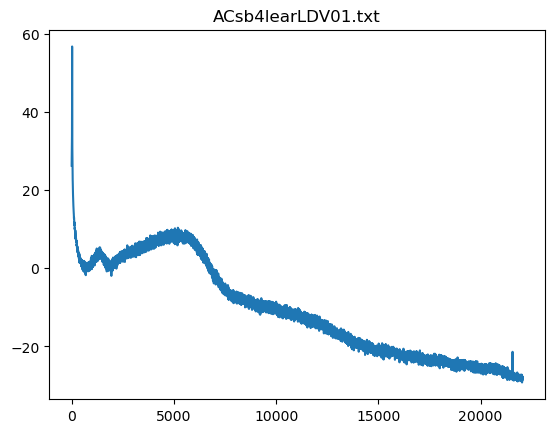

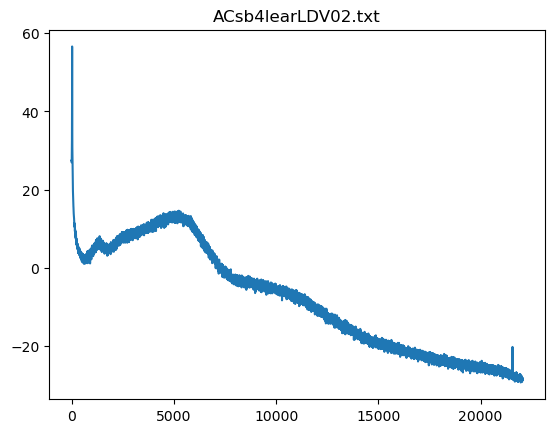

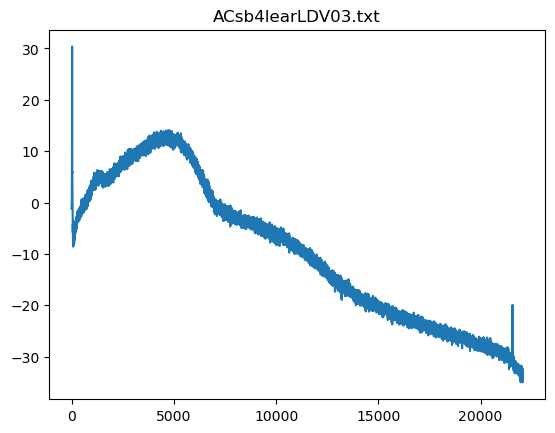

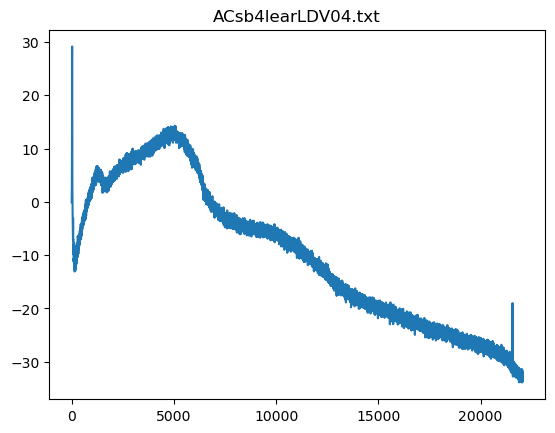

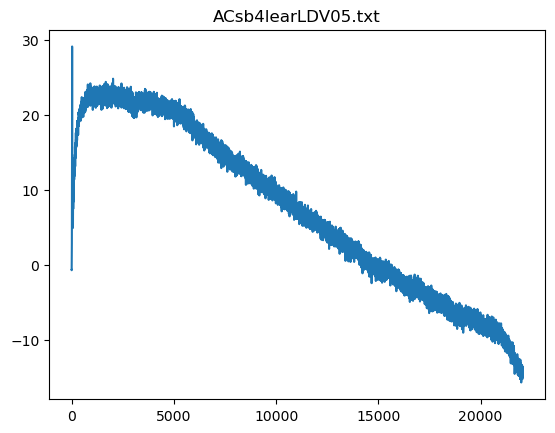

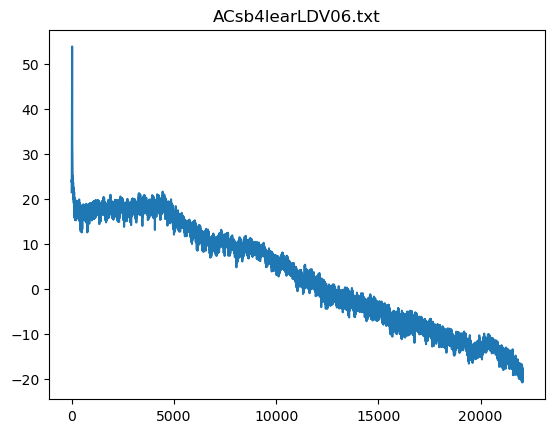

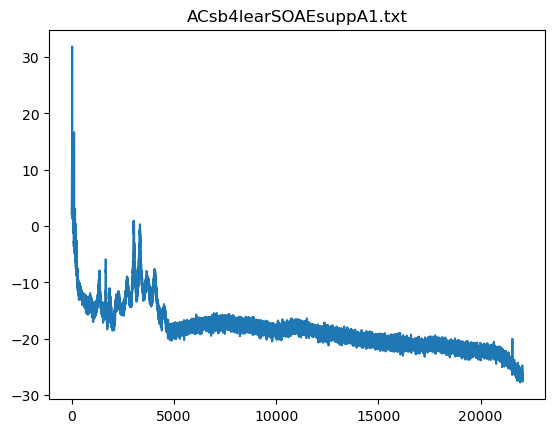

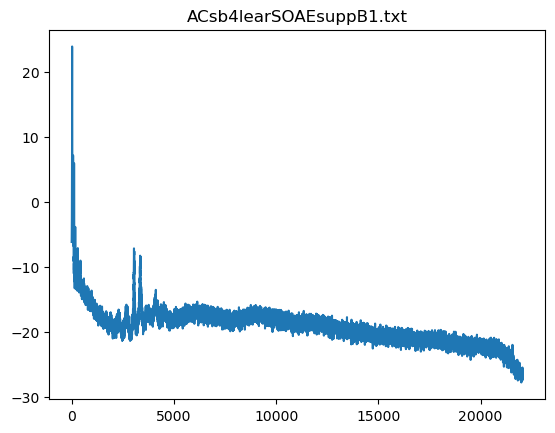

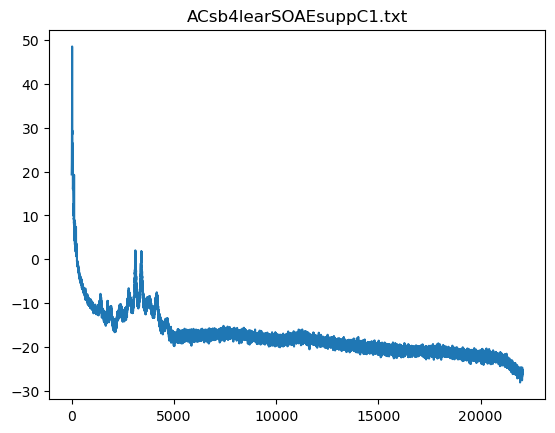

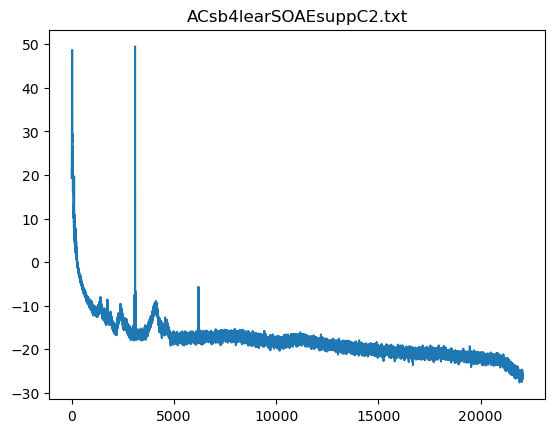

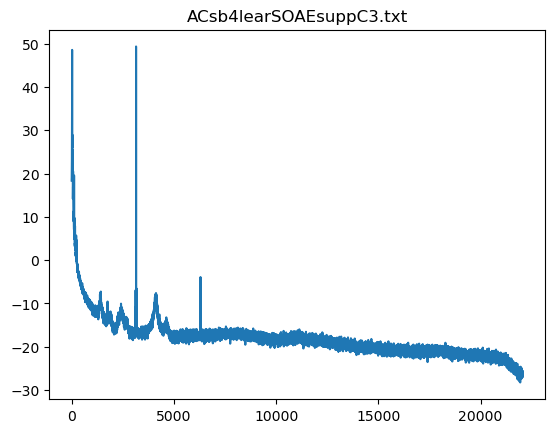

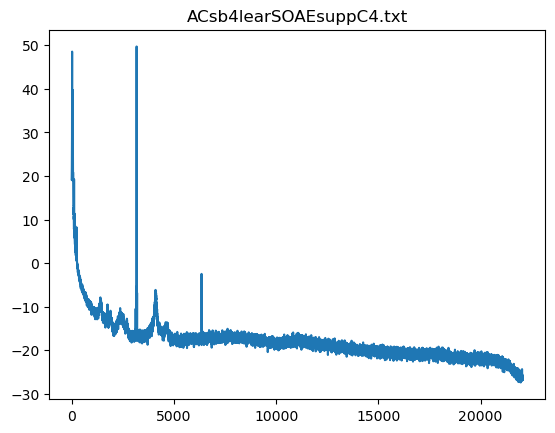

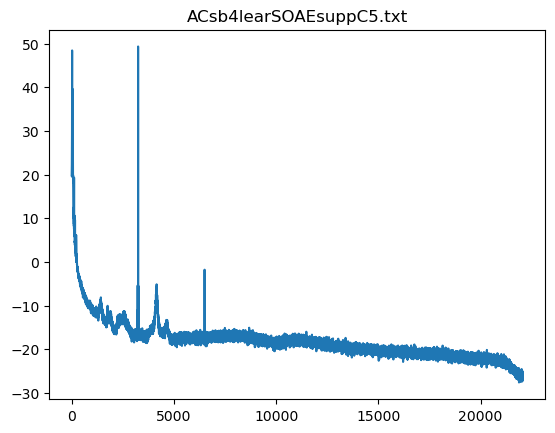

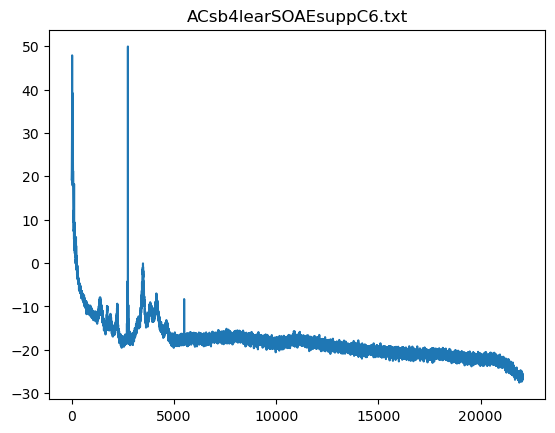

Waveform detecting, calculating mags


KeyboardInterrupt: 

In [10]:
# path1 = "C:\\Users\\Owner\OneDrive\\Desktop\\SOAE Data\\Pre-2014 Data\\Geckos et al MIT\\"
# path2 = "01.26.05\\"
# path1 = r"C:\Users\Owner\OneDrive\Desktop\SOAE Data\Pre-2014 Data\Human (UofA S&A via Wiggio)"
# path2 = "\\07.02.09"
# path1 = r"C:\Users\Owner\OneDrive\Desktop\SOAE Data\Pre-2014 Data\Lizards CUMC2011"
# path2 = r"\05.16.11"
path1 = r"C:\Users\Owner\OneDrive\Desktop\SOAE Data\York Data"
path2 = r"\04.12.17"
sf = False
for fp in Path(path1+path2).rglob('*'):
    fn = fp.name
    ext = fp.suffix
    if "README" in fn or ext in ('.rtf' '.pdf'):
        print(f"Skipping {fn}")
        continue
    try:
        plot_supp(fp, sf=sf)
    except:
        print("Waveform detecting, calculating mags")
        plot_mags(fp, t_win=1, sf=sf)
        

In [ ]:
subfolder = "Curated Data"
    
# We'll build our dataframe by making a dictionary of lists and appending to them
data = {
    'filepath': [],
    'wf': [],  
    'species': [],
    'sr': [],
}

# First navigate to our directory
directory_path = Path(main_path_str + subfolder)

# track which file we're on
n_files = sum(1 for _ in directory_path.rglob('*') if _.is_file())
i=0

# now loop through all files in that collection
for fp in directory_path.rglob('*'):
    # Check if it's a file
    if fp.is_file():  
        i += 1
        print(f"Processing file {i}/{n_files}")
        # Cut off the beginning of the filepath since it's unnecessary for our dataframe (fps = file path shortened)
        main_path = Path(main_path_str)
        fps = str(fp.relative_to(main_path))
        
        # Get the filename itself (without its containing folders)
        fn = fp.name
        # now we actually open the waveform here
        # Check if it's a .txt or .mat file
        try:
            if fp.suffix == '.mat':
                mat = scipy.io.loadmat(fp)
                if 'wf' in mat:
                    wf = np.squeeze(mat['wf'])
                else: 
                    print(f"Not sure how to process {fp}")
            if fp.suffix == '.txt':
                wf = np.loadtxt(fp)
            # Let's make sure this waveform is a 1D array
            if len(wf.shape) > 1:
                print(f"Waveform from {fps} isn't 1D!")
        except:
            f"Uh oh! Issue when loading {fp}"
            
            
        # try and get the species name
        fn_species = fn.split("_")[0]
        
        match fn_species:
            case 'anole':
                species = "Anole"
            case 'cricket':
                species = "Cricket"
            case 'human':
                species = "Human"
            case 'owl':
                species = "Owl"
            case _:
                species = ""
        
        # do some manual processing
        if len(fn.split("_")) > 1 and fn.split("_")[1][0:3] == "TAG":
            sr = 48000
            species = "Owl"
        else:
            sr = 44100
        
        if len(fps.split("/")) > 1 and fps.split("/")[1] == "Other":
            species = "Unknown"
            sr = 0
        
        match fn:
            case 'TT1learSOAEwf5.mat':
                species = "Tegu"
                sr = 44100
            case 'TT3li.mat':
                species = "Tegu"
                sr = 44100
            case 've10re01.mat':
                species = "Varanid"
            
                
        # add everything to our df dict
        data['filepath'].append(fps)
        data['wf'].append(wf)
        data['species'].append(species)
        data['sr'].append(sr)

# turn this into a pandas dataframe
df = pd.DataFrame(data)
# save this as a parquet file for efficient dataframe storage (use pyarrow since the 'wf' column has different length lists)
df.to_parquet(f'{subfolder}.parquet', engine='pyarrow')

In [ ]:
subfolder = "Extra Owl"
    
# We'll build our dataframe by making a dictionary of lists and appending to them
data = {
    'filepath': [],
    'wf': [],  
    'species': [],
    'sr': [],
}

# First navigate to our directory
directory_path = Path(main_path_str + subfolder)

# track which file we're on
n_files = sum(1 for _ in directory_path.rglob('*') if _.is_file())
i=0

# now loop through all files in that collection
for fp in directory_path.rglob('*'):
    # Check if it's a file
    if fp.is_file():  
        i += 1
        print(f"Processing file {i}/{n_files}")
        # Cut off the beginning of the filepath since it's unnecessary for our dataframe (fps = file path shortened)
        main_path = Path(main_path_str)
        fps = str(fp.relative_to(main_path))
        
        # Get the filename itself (without its containing folders)
        fn = fp.name
        # now we actually open the waveform here
        # Check if it's a .txt or .mat file
        try:
            if fp.suffix == '.mat':
                mat = scipy.io.loadmat(fp)
                if 'wf' in mat:
                    wf = np.squeeze(mat['wf'])
                else: 
                    print(f"Not sure how to process {fp}")
            if fp.suffix == '.txt':
                wf = np.loadtxt(fp)
            # Let's make sure this waveform is a 1D array
            if len(wf.shape) > 1:
                print(f"Waveform from {fps} isn't 1D!")
        except:
            f"Uh oh! Issue when loading {fp}"
            
        if str(fps).split("\\")[1]=='Oldenberg Data (2013) (44.1kHz)':
            sr = 44100
            species = "Owl"
        elif str(fps).split("\\")[1]=='Pim owl files (48 kHz)':
            sr = 48000
            species = "Owl"
        else:
            print("UH OH WHERE ARE WE")
        
            
                
        # add everything to our df dict
        data['filepath'].append(fps)
        data['wf'].append(wf)
        data['species'].append(species)
        data['sr'].append(sr)

# turn this into a pandas dataframe
df = pd.DataFrame(data)
# save this as a parquet file for efficient dataframe storage (use pyarrow since the 'wf' column has different length lists)
df.to_parquet(f'{subfolder}.parquet', engine='pyarrow')

In [ ]:
subfolder = "Lots of Data"
    
# We'll build our dataframe by making a dictionary of lists and appending to them
data = {
    'filepath': [],
    'wf': [],  
    'species': [],
    'sr': [],
}

# First navigate to our directory
directory_path = Path(main_path_str + subfolder)

# track which file we're on
n_files = sum(1 for _ in directory_path.rglob('*') if _.is_file())
i=0

# now loop through all files in that collection
for fp in directory_path.rglob('*'):
    # Check if it's a file
    if fp.is_file():  
        i += 1
        print(f"Processing file {i}/{n_files}")
        # Cut off the beginning of the filepath since it's unnecessary for our dataframe (fps = file path shortened)
        main_path = Path(main_path_str)
        fps = str(fp.relative_to(main_path))
        
        # Also get subsubfolder (if applicable)
        if len(fps.split("\\")) > 1:
            subsubfolder = fps.split("\\")[1]
        else:
            subsubfolder = "NA"
        
        # Get the filename itself (without its containing folders)
        fn = fp.name
        # now we actually open the waveform here
        # Check if it's a .txt or .mat file
        try:
            if fp.suffix == '.mat':
                mat = scipy.io.loadmat(fp)
                if 'wf' in mat:
                    wf = np.squeeze(mat['wf'])
                else: 
                    print(f"Not sure how to process {fp}")
            if fp.suffix == '.txt':
                wf = np.loadtxt(fp)
            # Let's make sure this waveform is a 1D array
            if len(wf.shape) > 1:
                print(f"Waveform from {fps} isn't 1D!")
        except:
            f"Uh oh! Issue when loading {fp}"
            
        # Get species
        subsubfolder_species = subsubfolder.split(".")[3]
        
        match subsubfolder_species:
            case 'tokay':
                species = "Tokay"
            case 'tegu':
                species = "Tegu"
            case 'human':
                species = "Human"
            case 'skink':
                species = "Skink"
            case 'owl':
                species = "Owl"
            case 'anolis':
                species = "Anolis"
            case 'ACsb42':
                species = "Anolis"
            case _:
                print(f"Couldn't find the species of {fn}")
        
        # These all should have the standard sample rate
        sr = 44100
                
        # add everything to our df dict
        data['filepath'].append(fps)
        data['wf'].append(wf)
        data['species'].append(species)
        data['sr'].append(sr)

# turn this into a pandas dataframe
df = pd.DataFrame(data)
# save this as a parquet file for efficient dataframe storage (use pyarrow since the 'wf' column has different length lists)
df.to_parquet(f'{subfolder}.parquet', engine='pyarrow')

In [ ]:
subfolder = "Pre-2014 Data"
    
# We'll build our dataframe by making a dictionary of lists and appending to them
data = {
    'filepath': [],
    'wf': [],  
    'species': [],
    'sr': [],
}

# First navigate to our directory
directory_path = Path(main_path_str + subfolder)

# track which file we're on
n_files = sum(1 for _ in directory_path.rglob('*') if _.is_file())
i=0

# now loop through all files in that collection
for fp in directory_path.rglob('*'):
    # Check if it's a file
    if fp.is_file():  
        i += 1
        print(f"Processing file {i}/{n_files}")
        # Cut off the beginning of the filepath since it's unnecessary for our dataframe (fps = file path shortened)
        main_path = Path(main_path_str)
        fps = str(fp.relative_to(main_path))
        
        # Also get subsubfolder (if applicable)
        if len(fps.split("\\")) > 1:
            subsubfolder = fps.split("\\")[1]
        else:
            subsubfolder = "NA"
        
        # Get the filename itself (without its containing folders)
        fn = fp.name
        ext = fp.suffix
        
        if "README" in fn or ext in ('.rtf' '.pdf'):
            print(f"Skipping {fn}")
            continue
            
        
        # now we actually open the waveform here
        # Check if it's a .txt or .mat file
        try:
            if ext == '.mat':
                mat = scipy.io.loadmat(fp)
                if 'wf' in mat:
                    wf = np.squeeze(mat['wf'])
                else: 
                    print(f"Not sure how to process {fp}")
            if ext == '.txt':
                wf = np.loadtxt(fp)
            # Let's make sure this waveform is a 1D array
            if len(wf.shape) > 1:
                print(f"Waveform from {fps} isn't 1D!")
        except:
            f"Uh oh! Issue when loading {fp}"
            
        # Get species
        subsubfolder_species = subsubfolder.split(".")[3]
        
        match subsubfolder_species:
            case 'tokay':
                species = "Tokay"
            case 'tegu':
                species = "Tegu"
            case 'human':
                species = "Human"
            case 'skink':
                species = "Skink"
            case 'owl':
                species = "Owl"
            case 'anolis':
                species = "Anolis"
            case 'ACsb42':
                species = "Anolis"
            case _:
                print(f"Couldn't find the species of {fn}")
        
            
                
        # add everything to our df dict
        data['filepath'].append(fps)
        data['wf'].append(wf)
        data['species'].append(species)
        data['sr'].append(sr)

# turn this into a pandas dataframe
df = pd.DataFrame(data)
# save this as a parquet file for efficient dataframe storage (use pyarrow since the 'wf' column has different length lists)
df.to_parquet(f'{subfolder}.parquet', engine='pyarrow')